# 최적화 함수 (Optimizer)

In [49]:
import numpy as np
import matplotlib.pyplot as plt

---

### 간단한 SGD (Stochastic Gradient Descent)

In [50]:
data_sample = np.random.uniform(-2,2,size=10)

def loss(x):
    return x**2

def gradient(x):
    return 2*x

In [51]:
def sgd(lr=0.1, epochs=10):
    w = np.random.uniform(-2,2)
    history = [w]

    for _ in range(epochs):
        sample = np.random.choice(data_sample)  # 1. 데이터에서 하나 뽑기 # sgd는 전체 샘플에서 ⭐랜덤하게⭐ 하나만 뽑는 것이라 데이터에서 하나만 뽑음
        grad = gradient(sample)                 # 2. 뽑은 데이터의 기울기를 계산 == 손실함수의 기울기 ==> 가중치 조절에 필요함
        w -= lr * grad                          # 3. 가중치에서 학습률*기울기를 빼기
        history.append(w)
    
    return history

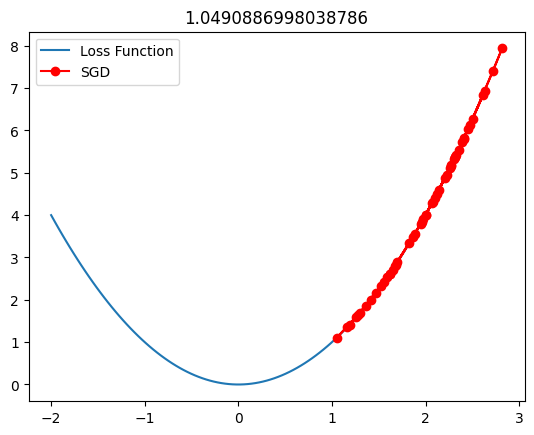

In [52]:
history = sgd(epochs=50)
min_val = min(history)
x_vals = np.linspace(-2,2,100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')
plt.plot(history, loss(np.array(history)), 'ro-', label='SGD')      # y축은 loss(np.array(history))
plt.legend()
plt.title(f'{min_val}')
plt.show()

---

### 모멘텀 추가

In [53]:
def sgd_momentum(lr=0.1, momentum=0.9, epochs=10):
    w = np.random.uniform(-2,2)
    v = 0
    history = [w]

    for _ in range(epochs):
        grad = gradient(w)
        v = momentum * v - lr * grad
        w += v
        history.append(w)
    
    return history

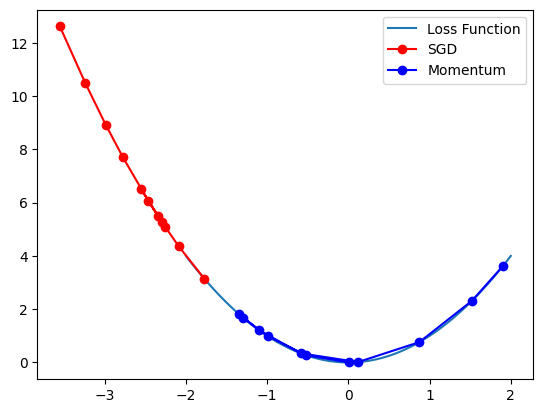

In [54]:
sgd_history = sgd()
momentum_history = sgd_momentum()

x_vals = np.linspace(-2,2,100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')

plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(momentum_history, loss(np.array(momentum_history)), 'bo-', label='Momentum')

plt.legend()
plt.show()

---

### 학습률에 따른 SGD

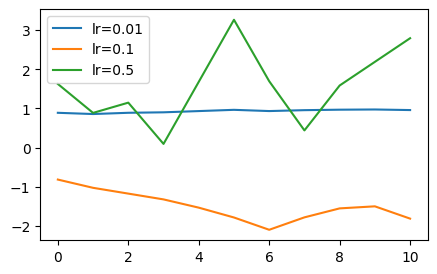

In [55]:
learning_rates = [0.01, 0.1, 0.5]
histories = [sgd(lr=lr) for lr in learning_rates]

plt.figure(figsize=(5,3))
for i, history in enumerate(histories):
    plt.plot(history, label=f'lr={learning_rates[i]}') # 학습률이 작으면 일직선으로 보이긴 하지만 찌끔씩 변하는게 보이긴 함 -> 적절한 lr을 지정해야 적절한 학습이 가능함

plt.legend()
plt.show()

---

### AdaGrad

In [56]:
def adagrad(lr=0.1, epsilon=1e-8, epochs=10): # 학습률이 무한히 커지는 것을 방지하지 위해 아주 작은 값인 epsilon을 더해줌
    w = np.random.uniform(-2,2)
    h=0
    history = [w]
    
    for _ in range(epochs):
        grad = gradient(w)
        h += grad ** 2 # lr과 h는 반비례 관계
        w -= (lr / (np.sqrt(h) + epsilon)) * grad
        history.append(w)
    
    return history

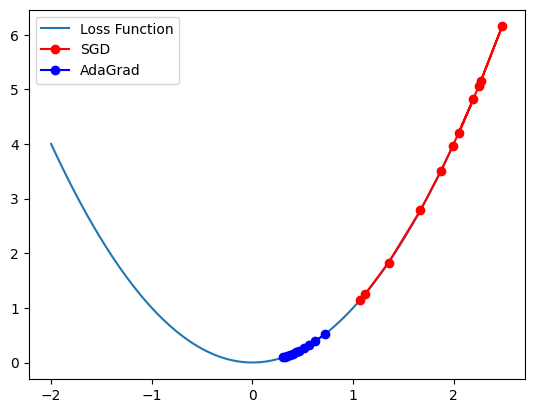

In [57]:
sgd_history = sgd()
adagrad_history = adagrad()

x_vals = np.linspace(-2,2,100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')

plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'bo-', label='AdaGrad')

plt.legend()
plt.show()

---

### RMSProp

In [58]:
def rmsprop(lr=0.1, beta=0.9, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2,2)
    h = 0
    history = [w]

    for _ in range(epochs):
        grad = gradient(w)
        h = beta * h + (1-beta) * grad ** 2
        w -= (lr / (np.sqrt(h) + epsilon)) * grad
        history.append(w)
    
    return history

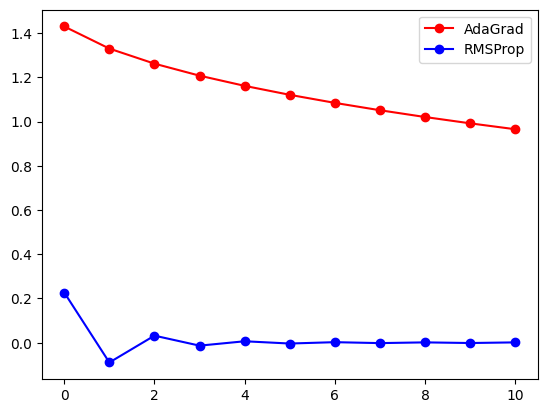

In [59]:
adagrad_history = adagrad()
rmsprop_history = rmsprop()

plt.plot(range(11), adagrad_history, 'ro-', label='AdaGrad')
plt.plot(range(11), rmsprop_history, 'bo-', label='RMSProp')

plt.legend()
plt.show()

---

### Adam

In [60]:
def adam(lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2,2)
    m, v = 0, 0
    history = [w]

    for t in range(1, epochs+1):
        grad = gradient(w)

        m = beta1 * m + (1-beta1) * grad
        v = beta2 * v + (1-beta2) * grad ** 2
        m_hat = m / (1-beta1 ** t)          # 편향 고정을 위해 넣음
        v_hat = v / (1-beta2 ** t)          # 편향 고정을 위해 넣음
        w -= (lr / (np.sqrt(v_hat) + epsilon)) * m_hat
        history.append(w)
    
    return history

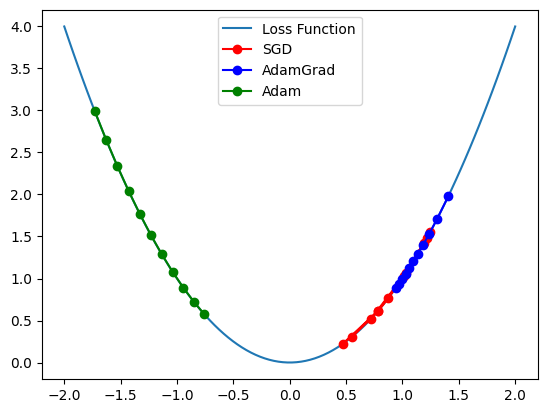

In [61]:
sgd_history = sgd()         # 비복원 학습을 통해 데이터를 하나만 뽑음
adagrad_history = adagrad() # 제곱합을 누적해서 학습률을 조정
adam_history = adam()       # sgd, adagrad를 결합해서 학습률을 조정하며 최적의 값에 수렴

x_vals = np.linspace(-2,2,100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')

plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='SGD')
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'bo-', label='AdamGrad')
plt.plot(adam_history, loss(np.array(adam_history)), 'go-', label='Adam')

plt.legend()
plt.show()

---

### PyTorch 활용 -> SGD vs Adam 비교

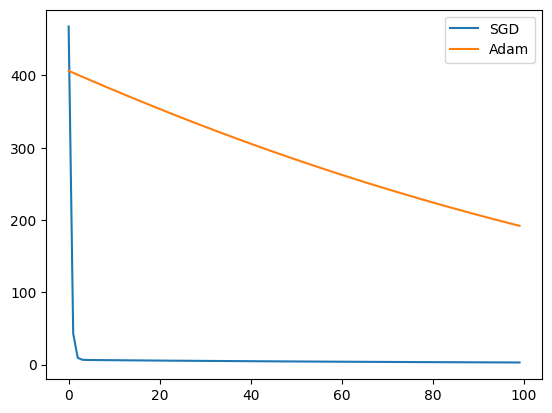

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)
X = torch.rand(100,1) * 10
y = 3 * X + 5 + torch.randn(100,1)

model_sgd = nn.Linear(1,1)
model_adam = nn.Linear(1,1)

# 손실함수 설정: 평균 제곱 오차로 설정
criterion = nn.MSELoss()
optim_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)          # SGD의 optimizer가 만들어지고 업데이트 해줄 대상 파라미터와 학습률을 넣기
optim_adam = optim.Adam(model_adam.parameters(), lr=0.01)       

epochs = 100
losses_sgd = []
losses_adam = []

# sgd: 학습이 불안정한 상태
for epoch in range(epochs):
    optim_sgd.zero_grad()           # 가중치 초기화
    outputs = model_sgd(X)          # [순전파] 모델을 통과시켜 예측값 얻기
    loss = criterion(outputs, y)    # [순전파] 예측값과 실제값으로 손실 구하기
    loss.backward()                 # 역전파
    optim_sgd.step()                # 역전파를 통해 학습한 가중치로 optimizer의 가중치를 변화
    losses_sgd.append(loss.item())   # 시각화를 위해 배열에 손실 추가

# adam: 손실값이 sgd보다 안정적으로 떨어짐
for epoch in range(epochs):
    optim_adam.zero_grad()
    outputs = model_adam(X)
    loss = criterion(outputs, y)
    loss.backward()                 # 역전파
    optim_adam.step()
    losses_adam.append(loss.item())

plt.plot(losses_sgd, label='SGD')
plt.plot(losses_adam, label='Adam')
plt.legend()
plt.show()